In [1]:
from friends import retrieve_observable_and_ansatz
obsv, qc, params = retrieve_observable_and_ansatz()

In [2]:
obsv

PauliSumOp(SparsePauliOp(['IIII', 'XXXX', 'YXYX', 'IZXX', 'ZZXX', 'IIXX', 'ZIXX', 'XYXY', 'YYYY', 'IIIZ', 'XXZZ', 'XXIZ', 'IZIZ', 'IZZZ', 'ZZZZ', 'ZZIZ', 'IIZZ', 'ZIZZ', 'ZIIZ', 'XXZI', 'XXII', 'IZII', 'IZZI', 'ZZZI', 'ZZII', 'IIZI', 'ZIZI', 'ZIII'],
              coeffs=[-1.40343802e+01+0.j,  1.89666179e-02+0.j, -1.89666179e-02+0.j,
 -1.89666179e-02+0.j,  1.89666179e-02+0.j,  1.89666179e-02+0.j,
 -1.89666179e-02+0.j, -1.89666179e-02+0.j,  1.89666179e-02+0.j,
 -1.60527381e-01+0.j,  5.30165769e-03+0.j,  5.30165769e-03+0.j,
 -2.41584122e-01+0.j,  8.88184955e-02+0.j,  9.94831530e-02+0.j,
 -8.88798376e-02+0.j,  8.58722654e-02+0.j,  8.88184955e-02+0.j,
 -8.88184955e-02+0.j,  5.30165769e-03+0.j,  5.30165769e-03+0.j,
  2.41584122e-01+0.j, -8.88184955e-02+0.j, -8.88798376e-02+0.j,
  9.94831530e-02+0.j, -1.60527381e-01+0.j, -2.41584122e-01+0.j,
  2.41584122e-01+0.j]), coeff=1.0)

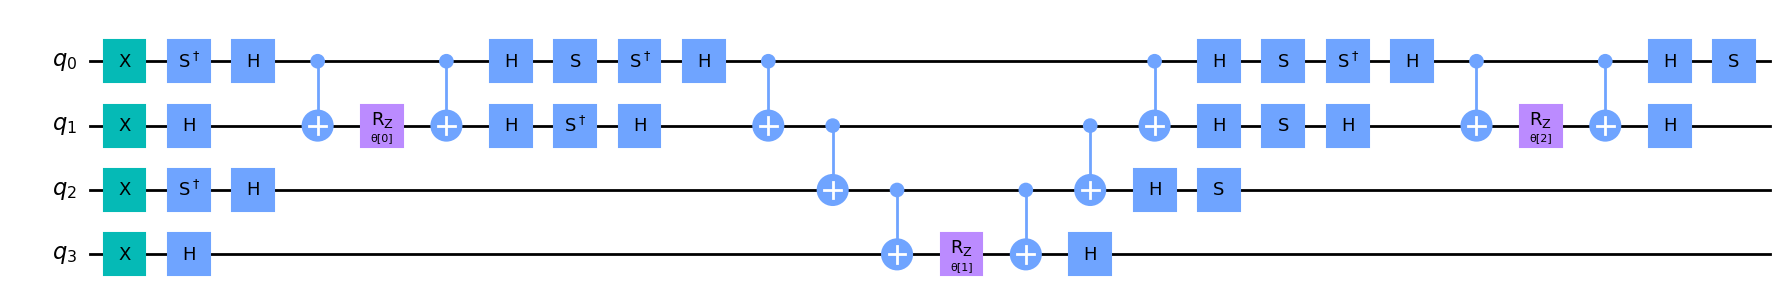

In [3]:
qc.draw('mpl', fold=-1)

In [4]:
params

[0.19535462771567846, 12.167984734279953, 0.19535462771567846]

In [5]:
from qiskit.primitives import Estimator
estimator = Estimator()
job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [6]:
job.result()

EstimatorResult(values=array([-14.60295835]), metadata=[{}])

In [7]:
results = []
results.append(job.result().values[0])

In [8]:
from qiskit_ibm_runtime import Options

options = Options()
options.optimization_level = 0

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator

service = QiskitRuntimeService()
backend = service.get_backend('ibm_lagos')

In [10]:
with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [12]:
job.result()

EstimatorResult(values=array([-14.21913395]), metadata=[{'variance': 0.3198837586455653, 'shots': 4000}])

In [13]:
results.append(job.result().values[0])

In [14]:
options.optimization_level = 2
options.transpilation.layout_method = "sabre"

In [15]:
options

Options(optimization_level=2, resilience_level=None, max_execution_time=None, transpilation=TranspilationOptions(skip_transpilation=False, initial_layout=None, layout_method='sabre', routing_method=None, approximation_degree=None), resilience=ResilienceOptions(noise_amplifier='TwoQubitAmplifier', noise_factors=(1, 3, 5), extrapolator='LinearExtrapolator'), execution=ExecutionOptions(shots=4000, init_qubits=True), environment=EnvironmentOptions(log_level='WARNING', callback=None, job_tags=[]), simulator=SimulatorOptions(noise_model=None, seed_simulator=None, coupling_map=None, basis_gates=None))

In [16]:
with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [18]:
job.result()

EstimatorResult(values=array([-14.53703338]), metadata=[{'variance': 0.11849432741875174, 'shots': 4000}])

In [19]:
results.append(job.result().values[0])

In [21]:
options.optimization_level = 0

In [22]:
options.resilience_level = 1

with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [25]:
job.result()

EstimatorResult(values=array([-14.54698572]), metadata=[{'variance': 0.16701960026941956, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

In [26]:
results.append(job.result().values[0])

In [27]:
options.resilience_level = 2
options.resilience.noise_amplifier = 'TwoQubitAmplifier'
options.resilience.noise_factors = (1, 1.2, 1.5)
options.resilience.extrapolator = 'LinearExtrapolator'

with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [29]:
job.result()

EstimatorResult(values=array([-14.59176797]), metadata=[{'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 1.2, 1.5], 'values': [-14.543479768105339, -14.512218600605587, -14.51305556999569], 'variance': [0.12659279703299403, 0.1419320289939639, 0.1640169091918978], 'shots': [4000, 4000, 4000]}, 'extrapolation': {'extrapolator': 'LinearExtrapolator'}}}])

In [30]:
results.append(job.result().values[0])

In [33]:
from datetime import datetime

def interim_results_callback(job_id, result):
    now = datetime.now()
    print(now, "*** Callback ***", result, "\n")
    
options.optimization_level = 0
options.execution.shots = 300
options.environment.callback = interim_results_callback

In [34]:
options.resilience_level = 3

with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

```
2023-03-16 18:59:00.897374 *** Callback *** {'unique_layers_detected': 3, 'total_layers': 70} 

2023-03-16 19:01:12.812642 *** Callback *** {'msg': 'Sampling overhead for layer 1/3: 1.0381497062307443'} 

2023-03-16 19:03:21.394775 *** Callback *** {'msg': 'Sampling overhead for layer 2/3: 1.0418104322947281'} 

2023-03-16 19:04:45.393501 *** Callback *** {'msg': 'Sampling overhead for layer 3/3: 1.0308667982144537'} 

2023-03-16 19:04:45.588625 *** Callback *** {'sampling_overhead_by_layer': [1.0308667982144537, 1.0418104322947281, 1.0381497062307443], 'unique_layers': 3, 'total_sampling_overhead': 1.4439176359094685} 

2023-03-16 19:10:00.282664 *** Callback *** {'values': [-15.004731920399502], 'metadata': [{'standard_error': 0.4063455807551261, 'confidence_interval': [-15.161583714947211, -14.847880125851793], 'confidence_level': 0.95, 'shots': 55424, 'samples': 433, 'sampling_overhead': 1.4439176359094685, 'total_mitigated_layers': 10}]} 
```

In [39]:
job.result()

EstimatorResult(values=array([-15.00473192]), metadata=[{'standard_error': 0.4063455807551261, 'confidence_interval': [-15.161583714947211, -14.847880125851793], 'confidence_level': 0.95, 'shots': 55424, 'samples': 433, 'sampling_overhead': 1.4439176359094685, 'total_mitigated_layers': 10}])

In [40]:
results.append(job.result().values[0])

Text(0, 0.5, 'Energy')

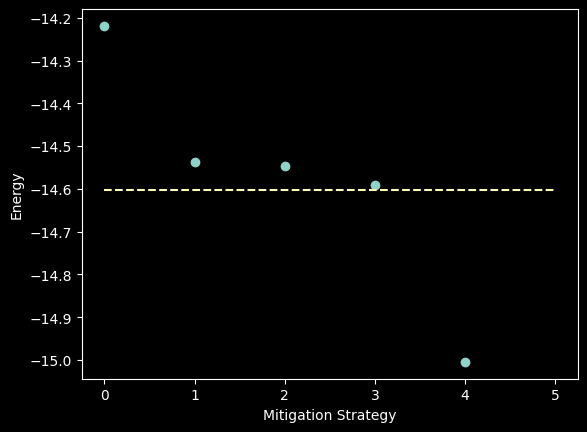

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(len(results)-1), results[1:], ls= ' ', marker='o')
plt.plot([0, len(results)-1], [results[0], results[0]], ls='--')
plt.xlabel('Mitigation Strategy')
plt.ylabel('Energy')